In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import KNNImputer

In [38]:
df=pd.read_excel('Customer+Churn+Data.xlsx', sheet_name='Data for DSBA')
df.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [39]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [40]:
df = df.drop(["AccountID"], axis=1)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [41]:
df.shape

(11260, 18)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

<AxesSubplot:>

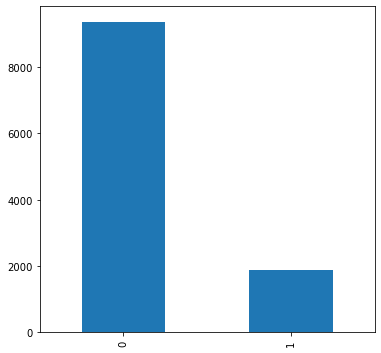

In [43]:
df['Churn'].value_counts().plot(kind='bar',figsize=(6,6))

In [44]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


In [45]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [46]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

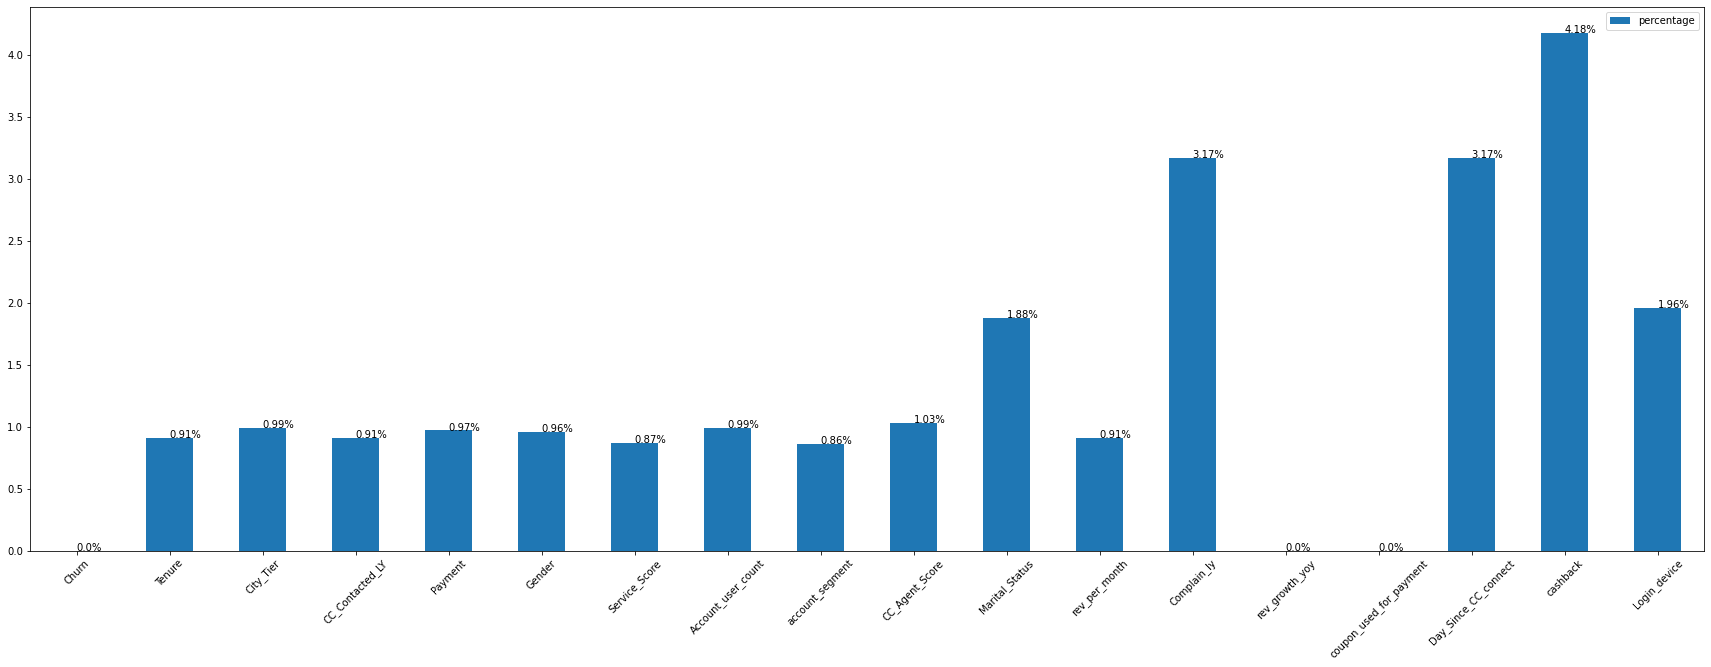

In [47]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe


barchart = missing_df.plot.bar(y='percentage',rot=45,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

In [48]:
df['Tenure'] = df['Tenure'].fillna("No_info")
df['Payment'] = df['Payment'].fillna("No_info")
df['Gender'] = df['Gender'].fillna("No_info")
df['Account_user_count'] = df['Account_user_count'].fillna("No_info")
df['account_segment'] = df['account_segment'].fillna("No_info")
df['Marital_Status'] = df['Marital_Status'].fillna("No_info")
df['rev_per_month'] = df['rev_per_month'].fillna("No_info")
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna("No_info")
df['cashback'] = df['cashback'].fillna("No_info")
df['Login_device'] = df['Login_device'].fillna("No_info")

In [49]:
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mean())
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].mean())
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mean())
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mean())
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mean())

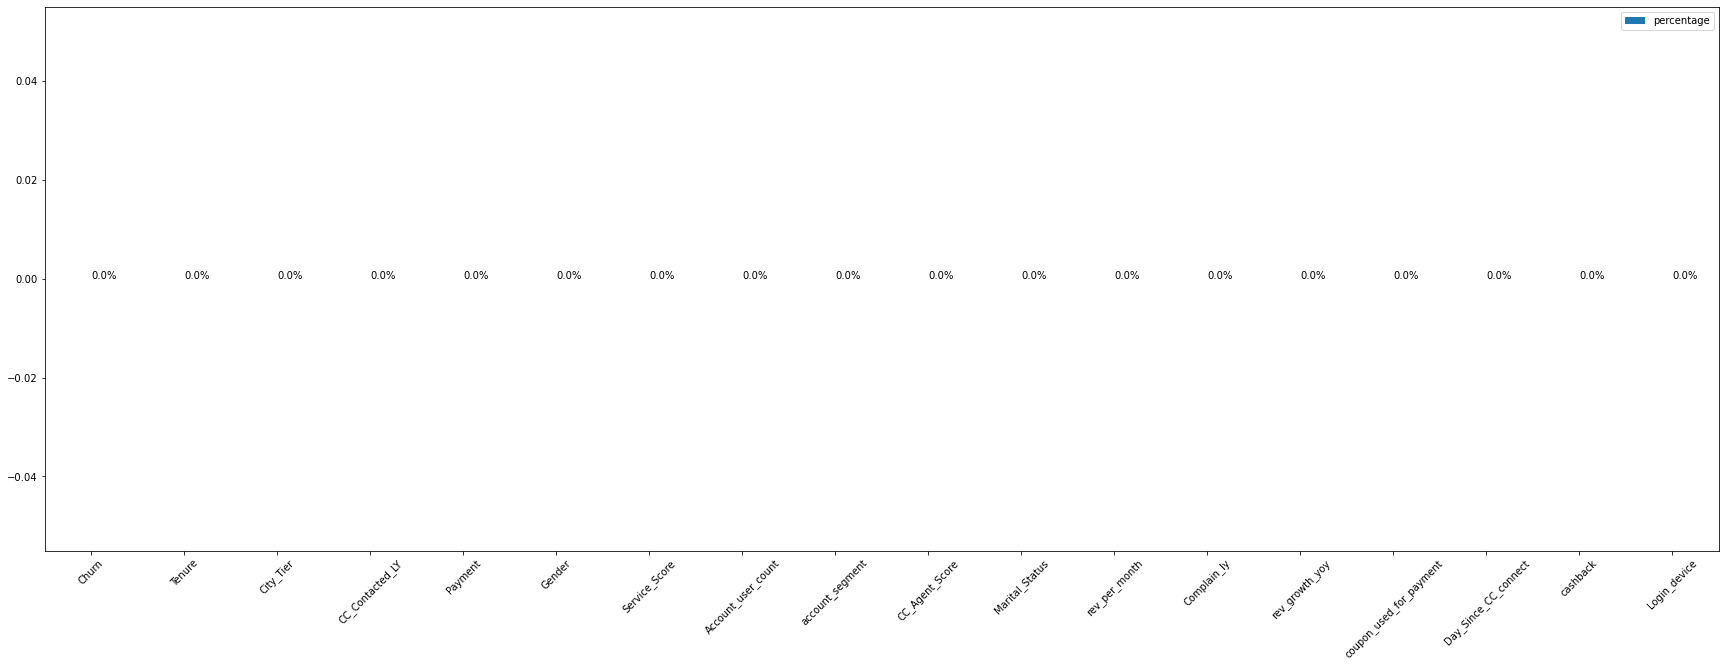

In [50]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=45,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

In [51]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head(2)

Number of duplicate rows = 264


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1347,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
1395,1,11,1.0,6.0,Debit Card,Male,3.0,4,HNI,3.0,Single,10,1.0,13,0,0,153.81,Mobile


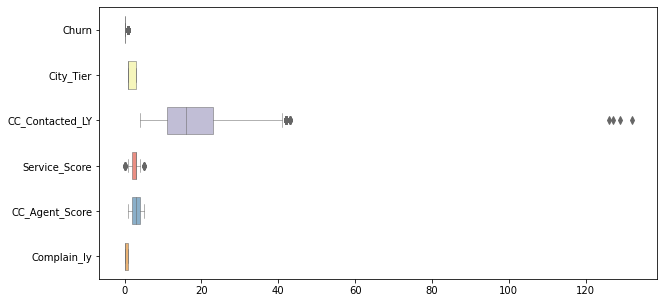

In [52]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [53]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [54]:
for feature in df[['CC_Contacted_LY','Service_Score']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

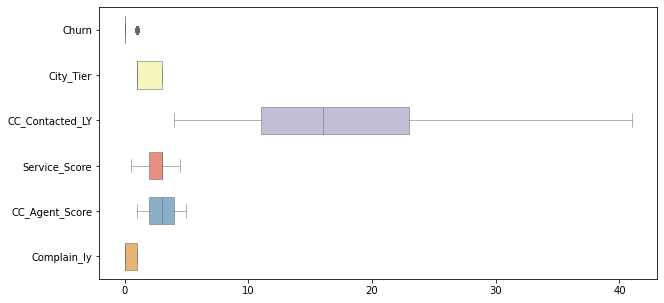

In [55]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

## EDA UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Churn', ylabel='count'>

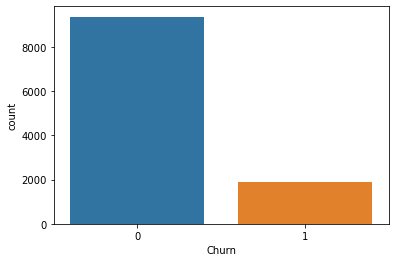

In [56]:
sns.countplot(data=df, x='Churn')

In [57]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [58]:
data = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(data.columns.values)
len(lstnumericcolumns)

6

Description of Churn
----------------------------------------------------------------------------
count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64 Distribution of Churn
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

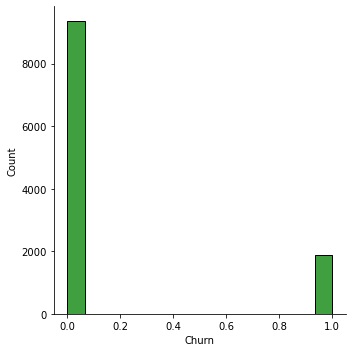

BoxPlot of Churn
----------------------------------------------------------------------------


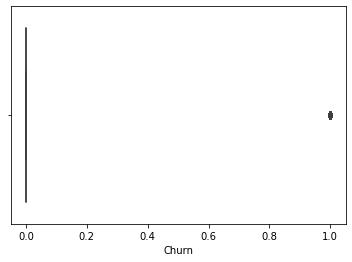

Description of City_Tier
----------------------------------------------------------------------------
count    11260.000000
mean         1.653929
std          0.910453
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64 Distribution of City_Tier
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

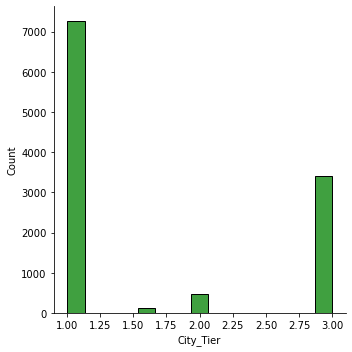

BoxPlot of City_Tier
----------------------------------------------------------------------------


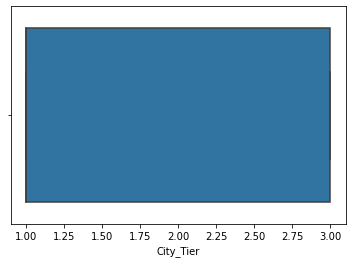

Description of CC_Contacted_LY
----------------------------------------------------------------------------
count    11260.000000
mean        17.831922
std          8.562382
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max         41.000000
Name: CC_Contacted_LY, dtype: float64 Distribution of CC_Contacted_LY
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

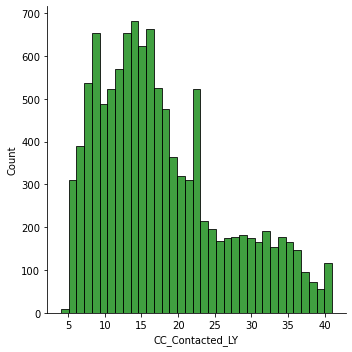

BoxPlot of CC_Contacted_LY
----------------------------------------------------------------------------


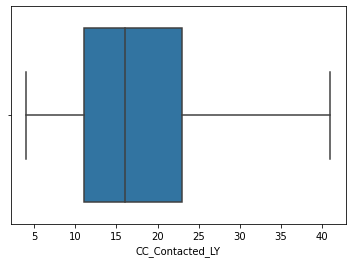

Description of Service_Score
----------------------------------------------------------------------------
count    11260.000000
mean         2.902660
std          0.720544
min          0.500000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.500000
Name: Service_Score, dtype: float64 Distribution of Service_Score
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

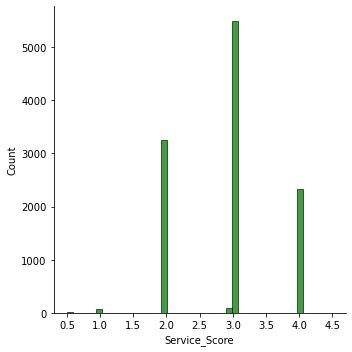

BoxPlot of Service_Score
----------------------------------------------------------------------------


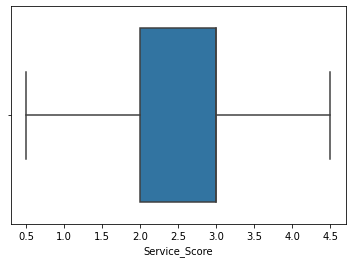

Description of CC_Agent_Score
----------------------------------------------------------------------------
count    11260.000000
mean         3.066493
std          1.372646
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64 Distribution of CC_Agent_Score
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

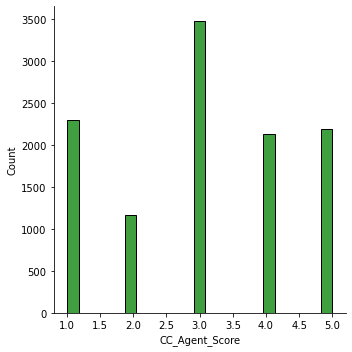

BoxPlot of CC_Agent_Score
----------------------------------------------------------------------------


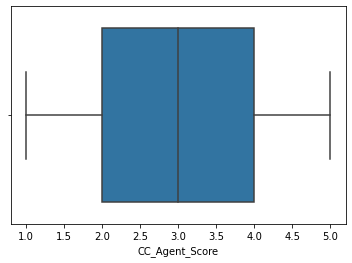

Description of Complain_ly
----------------------------------------------------------------------------
count    11260.000000
mean         0.285334
std          0.444377
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Complain_ly, dtype: float64 Distribution of Complain_ly
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

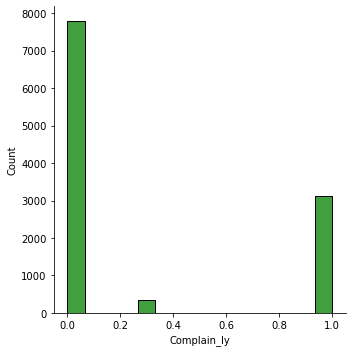

BoxPlot of Complain_ly
----------------------------------------------------------------------------


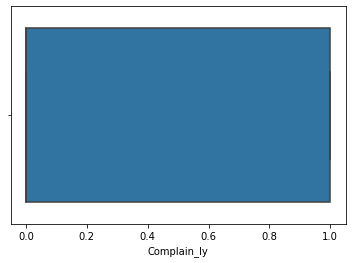

In [59]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

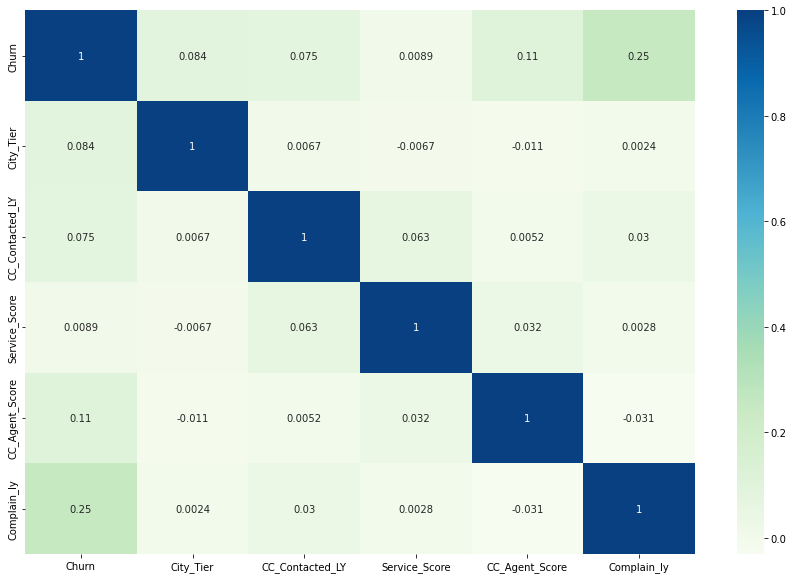

In [60]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), cmap = 'GnBu', annot = True)

In [63]:
df_cat = df.select_dtypes(['object'])

ValueError: num must be 1 <= num <= 6, not 7

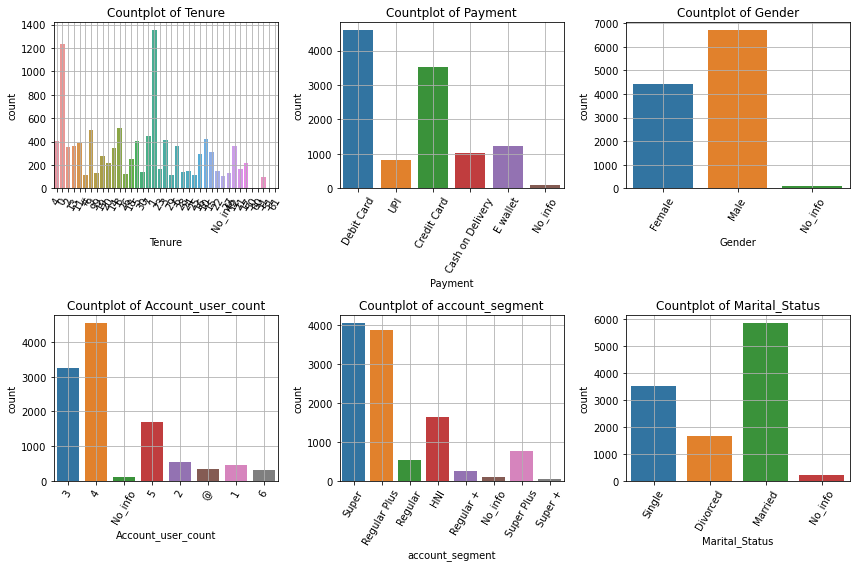

In [64]:
plt.figure(figsize=(12,8))
for i in range(len(df_cat.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df_cat, x=df_cat.columns[i])
    plt.grid(True)
    plt.xticks(rotation=60)
    plt.title(f'Countplot of {df_cat.columns[i]}')
    plt.tight_layout()
    i+=1

In [65]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Tenure
[4, 0, 2, 13, 11, ..., 50, 60, 31, 51, 61]
Length: 39
Categories (39, object): [0, 1, 2, 3, ..., 61, 99, '#', 'No_info']
[ 4  0  2 13 11 37  9 36 19 20 14  8 26 18  5 30  7  1 23  3 29  6 28 24
 25 16 10 15 22 38 27 12 21 17 32 34 31 33 35]


feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet', 'No_info']
Categories (6, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'No_info', 'UPI']
[2 5 1 0 3 4]


feature: Gender
['Female', 'Male', 'No_info']
Categories (3, object): ['Female', 'Male', 'No_info']
[0 1 2]


feature: Account_user_count
[3, 4, 'No_info', 5, 2, '@', 1, 6]
Categories (8, object): [1, 2, 3, 4, 5, 6, '@', 'No_info']
[2 3 7 4 1 6 0 5]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', 'No_info', 'Super Plus', 'Super +']
Categories (8, object): ['HNI', 'No_info', 'Regular', 'Regular +', 'Regular Plus', 'Super', 'Super +', 'Super Plus']
[5 4 2 0 3 1 7 6]


feature: Marita

In [66]:
df.dtypes

Churn                        int64
Tenure                        int8
City_Tier                  float64
CC_Contacted_LY            float64
Payment                       int8
Gender                        int8
Service_Score              float64
Account_user_count            int8
account_segment               int8
CC_Agent_Score             float64
Marital_Status                int8
rev_per_month                 int8
Complain_ly                float64
rev_growth_yoy                int8
coupon_used_for_payment       int8
Day_Since_CC_connect          int8
cashback                     int16
Login_device                  int8
dtype: object

In [67]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [68]:
df_impute = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [69]:
df_impute.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [70]:
cc_num = df_impute[['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 
           'Day_Since_CC_connect', 'cashback']]

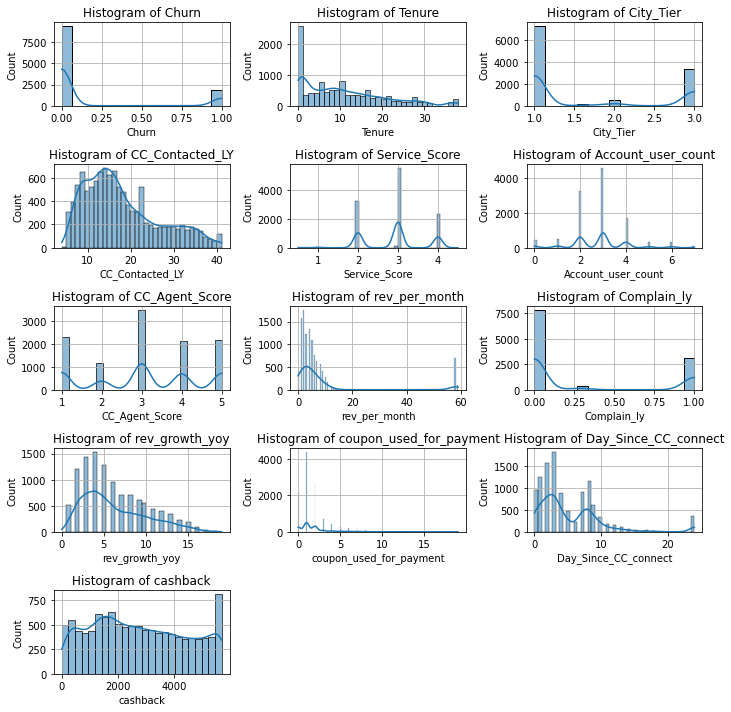

In [71]:
plt.figure(figsize=(10,10))
for i in range(len(cc_num.columns)):
    plt.subplot(5,3,i+1)
    sns.histplot(data=cc_num, x=cc_num.columns[i], kde=True)
    plt.grid(True)
    plt.title(f'Histogram of {cc_num.columns[i]}')
    plt.tight_layout()
    i+=1

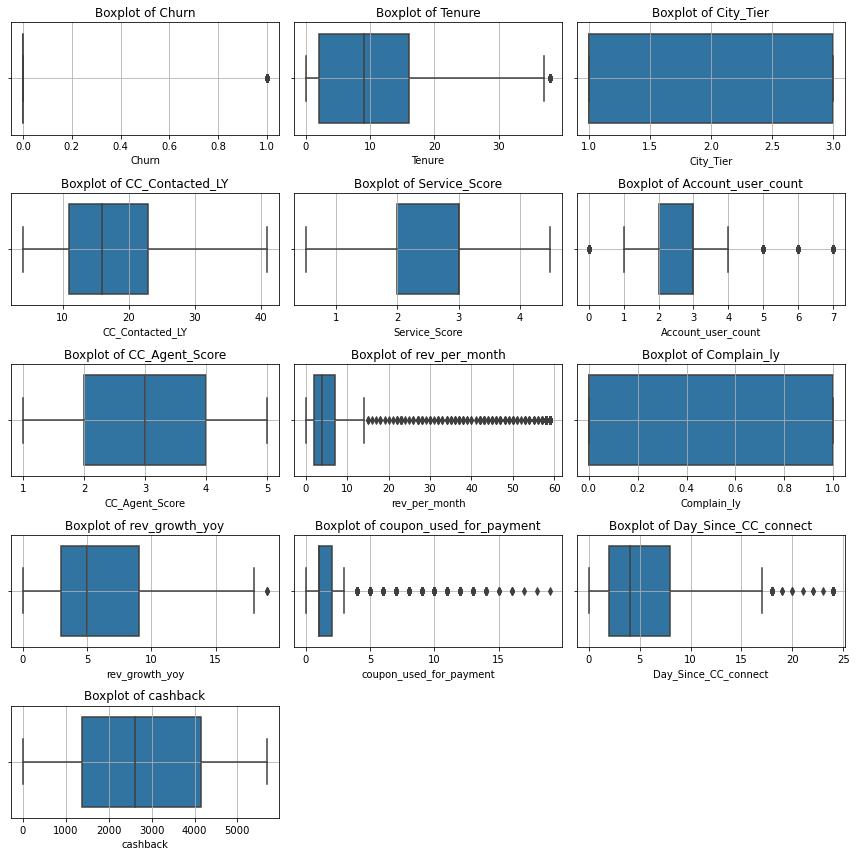

In [72]:
plt.figure(figsize=(12,12))
for i in range(len(cc_num.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(data=cc_num, x=cc_num.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {cc_num.columns[i]}')
    plt.tight_layout()
    i+=1

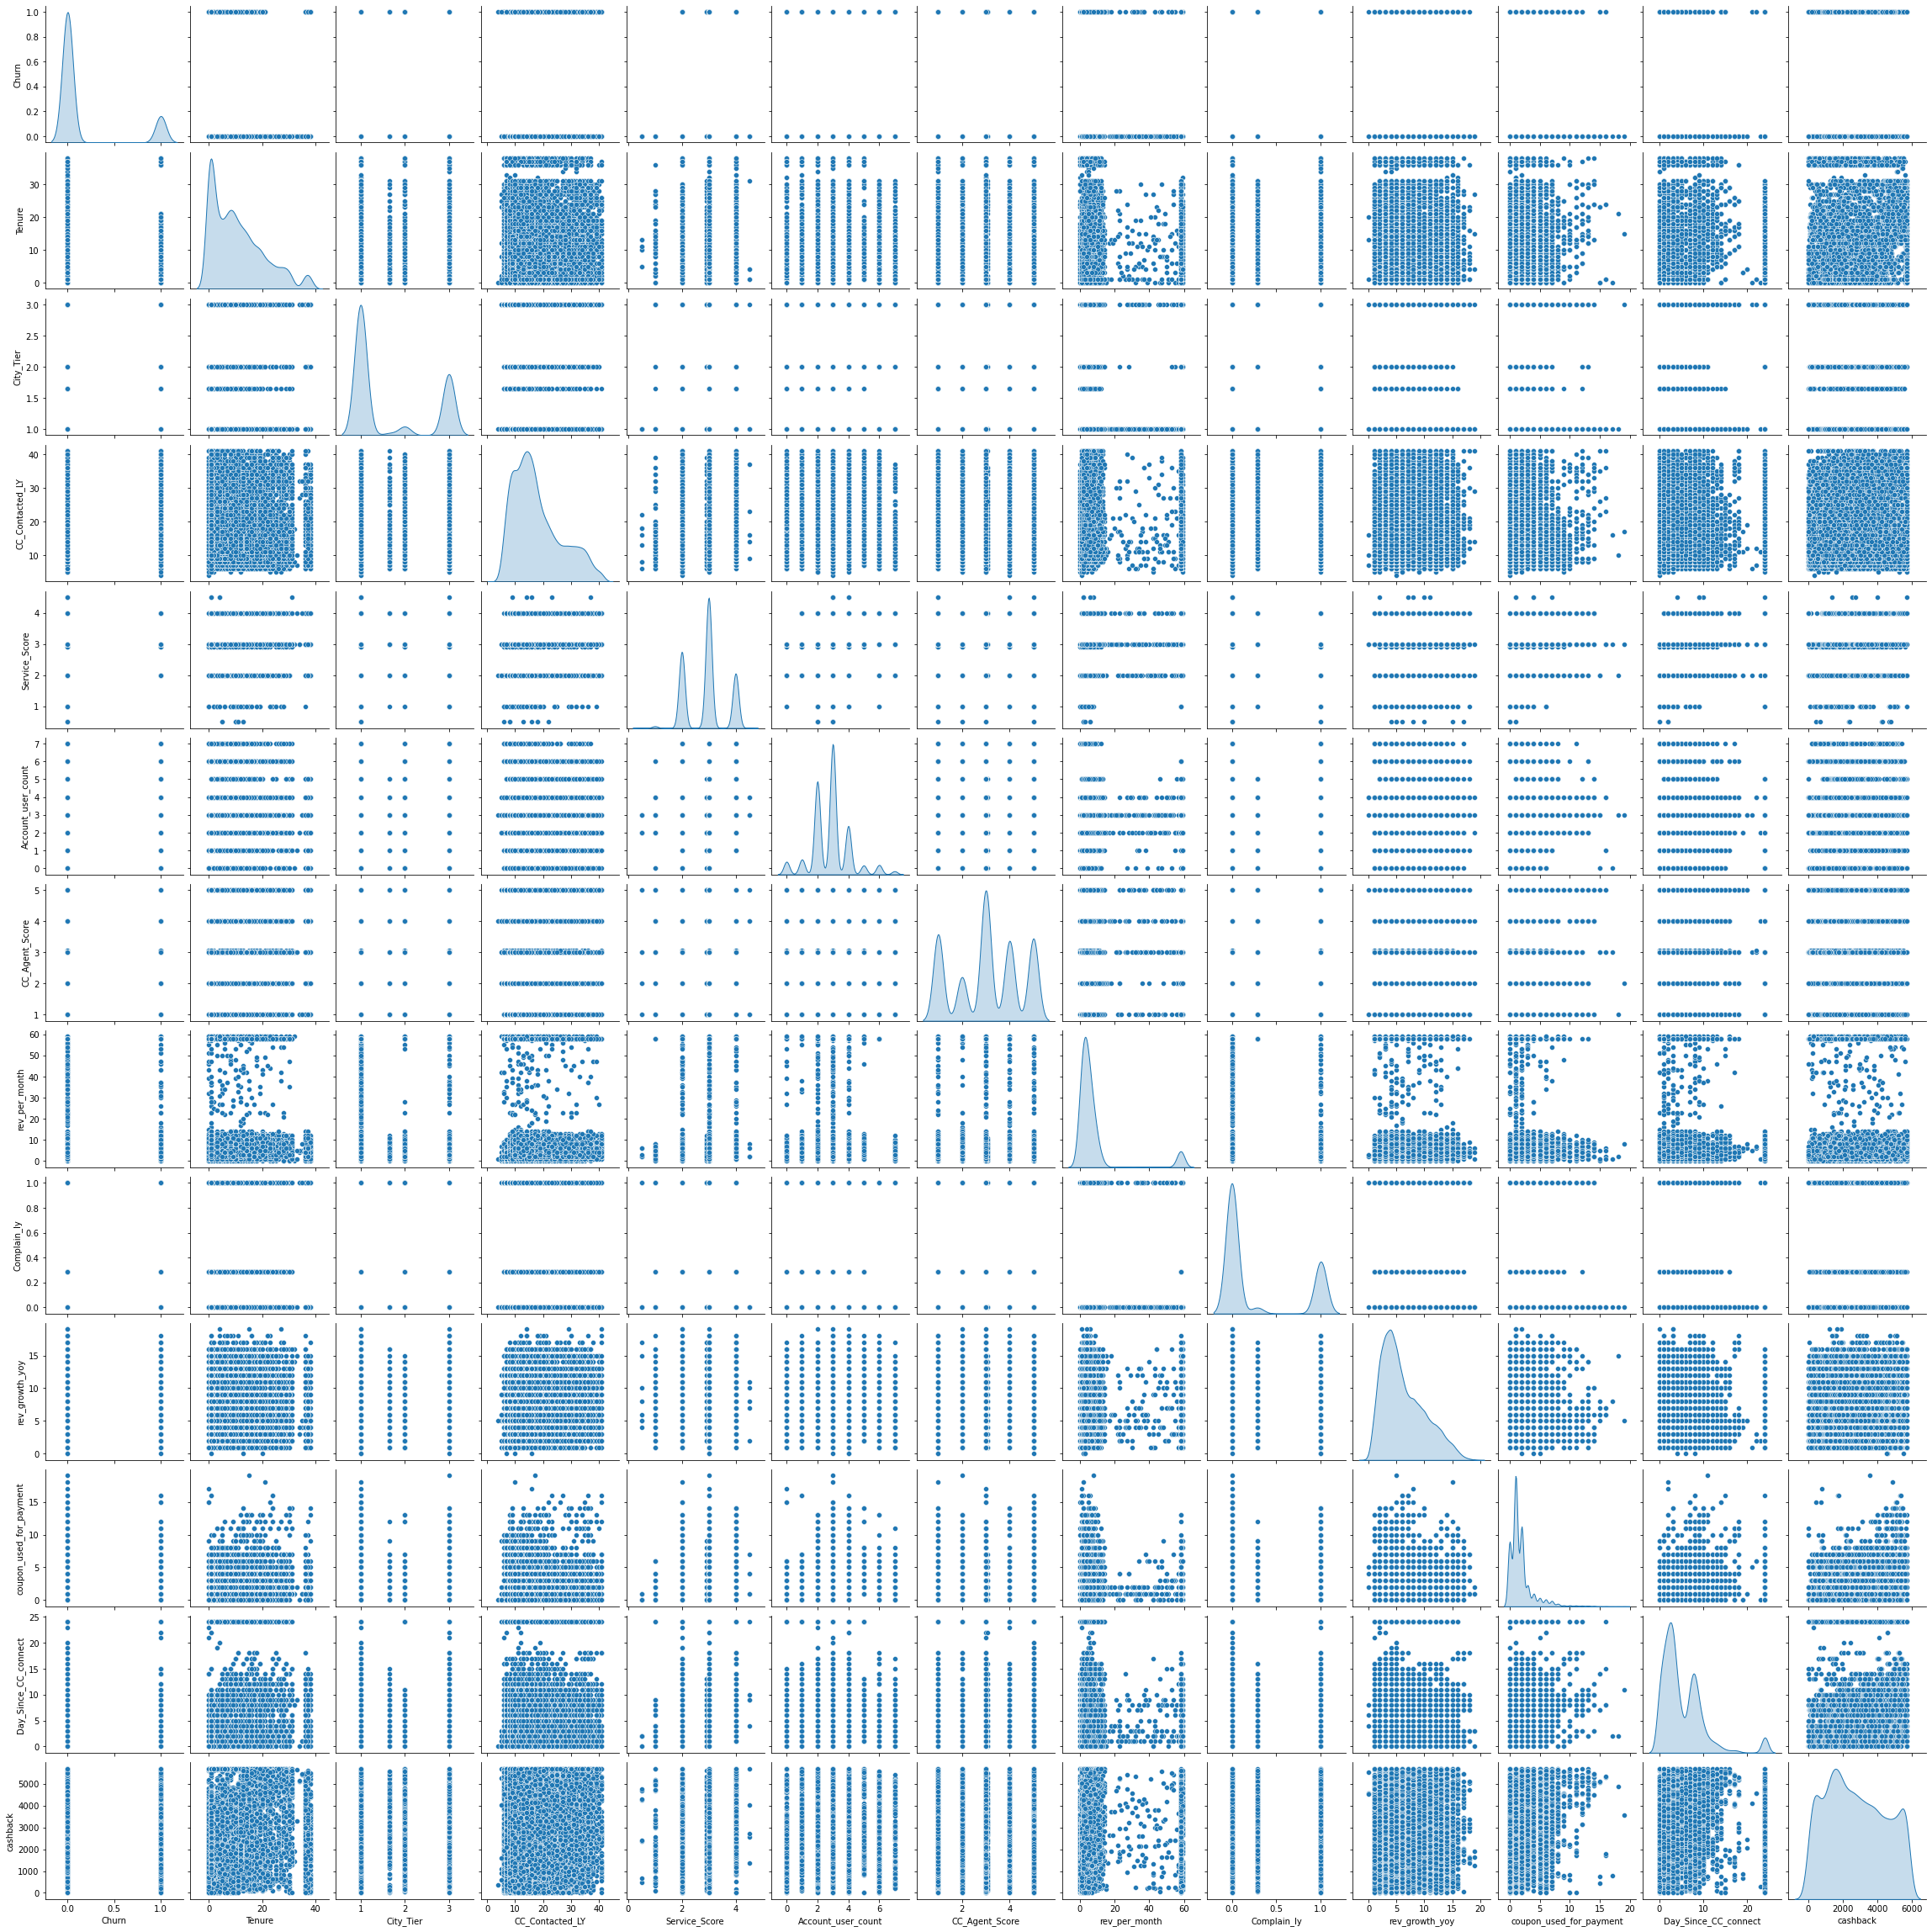

In [73]:
sns.pairplot(data=cc_num, diag_kind='kde');

In [74]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [75]:
lrTenure,urTenure=remove_outlier(df_impute['Tenure'])
df_impute['Tenure']=np.where(df_impute['Tenure']>urTenure,urTenure,df_impute['Tenure'])


lrCC_Contacted_LY,urCC_Contacted_LY=remove_outlier(df_impute['CC_Contacted_LY'])
df_impute['CC_Contacted_LY']=np.where(df_impute['CC_Contacted_LY']>urCC_Contacted_LY,urCC_Contacted_LY,df_impute['CC_Contacted_LY'])


lrrev_per_month,urrev_per_month=remove_outlier(df_impute['rev_per_month'])
df_impute['rev_per_month']=np.where(df_impute['rev_per_month']>urrev_per_month,urrev_per_month,df_impute['rev_per_month'])


lrcoupon_used_for_payment,urcoupon_used_for_payment=remove_outlier(df_impute['coupon_used_for_payment'])
df_impute['coupon_used_for_payment']=np.where(df_impute['coupon_used_for_payment']>urcoupon_used_for_payment,urcoupon_used_for_payment,df_impute['coupon_used_for_payment'])


lrDay_Since_CC_connect,urDay_Since_CC_connect=remove_outlier(df_impute['Day_Since_CC_connect'])
df_impute['Day_Since_CC_connect']=np.where(df_impute['Day_Since_CC_connect']>urDay_Since_CC_connect,urDay_Since_CC_connect,df_impute['Day_Since_CC_connect'])


lrcashback,urcashback=remove_outlier(df_impute['cashback'])
df_impute['cashback']=np.where(df_impute['cashback']>urcashback,urcashback,df_impute['cashback'])
df_impute['cashback']=np.where(df_impute['cashback']<lrcashback,lrcashback,df_impute['cashback'])

In [76]:
selected_cols = df_impute[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment', 
                    'Day_Since_CC_connect', 'cashback']]

In [77]:
selected_cols

,Tenure,CC_Contacted_LY,rev_per_month,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,4.0,6.0,8.0,1.0,5.0,2222.0
1,0.0,8.0,6.0,0.0,0.0,109.0
2,0.0,30.0,5.0,0.0,3.0,5693.0
3,0.0,15.0,7.0,0.0,3.0,748.0
4,0.0,12.0,2.0,1.0,3.0,552.0
...,...,...,...,...,...,...
11255,10.0,34.0,8.0,1.0,4.0,1810.0
11256,13.0,19.0,6.0,1.0,8.0,4481.0
11257,1.0,14.0,6.0,1.0,4.0,3680.0
11258,23.0,11.0,6.0,2.0,9.0,3244.0


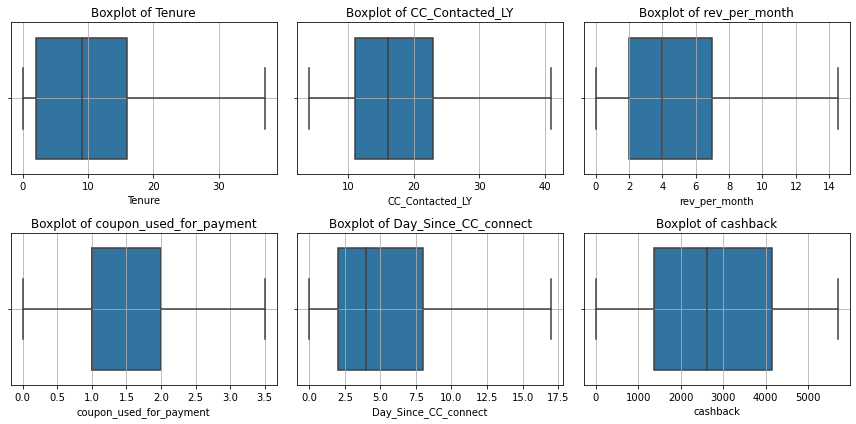

In [78]:
plt.figure(figsize=(12,6))
for i in range(len(selected_cols.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=selected_cols, x=selected_cols.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {selected_cols.columns[i]}')
    plt.tight_layout()
    i+=1

In [79]:
df_impute['Churn'].value_counts(normalize=True)

0.0    0.831616
1.0    0.168384
Name: Churn, dtype: float64

In [80]:
# Libraries required to build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# Libraries required for hyperparameter tuning
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    cross_val_score,
    StratifiedKFold,
)

# Libraries to get different metric scores
# from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Library required to split the data
from sklearn.model_selection import train_test_split

In [82]:
X = df_impute.drop("Churn", axis=1)
y = df_impute["Churn"]

In [83]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting the temporary set into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [84]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Testing set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in validation set : ")
print(y_val.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6756, 17)
Shape of Validation set :  (2252, 17)
Shape of Testing set :  (2252, 17)

 Percentage of classes in training set : 
0.0    0.831557
1.0    0.168443
Name: Churn, dtype: float64

 Percentage of classes in validation set : 
0.0    0.831705
1.0    0.168295
Name: Churn, dtype: float64

 Percentage of classes in test set : 
0.0    0.831705
1.0    0.168295
Name: Churn, dtype: float64


In [92]:
print(X_train.isna().sum())
print("-" * 40)
print(X_val.isna().sum())
print("-" * 40)
print(X_test.isna().sum())

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64
----------------------------------------
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback          

In [95]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model : classifier
    predictors : independent variables
    target : dependent variable
    
    """
    # predicting using the independent variables
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0]
    )
    return df_perf

In [96]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [87]:
models = []  # Empty list to store all the models

# Appending the models to the list
models.append(("LR", LogisticRegression(solver="newton-cg", random_state=1)))
models.append(("Dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all models' CV scores
names = []  # Empty list to store name of the models


In [88]:
print("Cross-Validation Performance :\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting the number of splits to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{} : {}".format(name, cv_result.mean() * 100))

print("\nValidation set Performance :\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{} : {}".format(name, scores))

Cross-Validation Performance :

LR : 37.43488677641239
Dtree : 76.71535667362238
Bagging : 72.23587603369658
RandomForest : 76.36447948063993
Adaboost : 55.62601437514492
GBM : 57.824406832058116
XGBoost : 79.96676713810959

Validation set Performance :

LR : 42.21635883905013
Dtree : 82.58575197889182
Bagging : 79.94722955145119
RandomForest : 82.58575197889182
Adaboost : 61.21372031662269
GBM : 61.477572559366756
XGBoost : 84.69656992084433


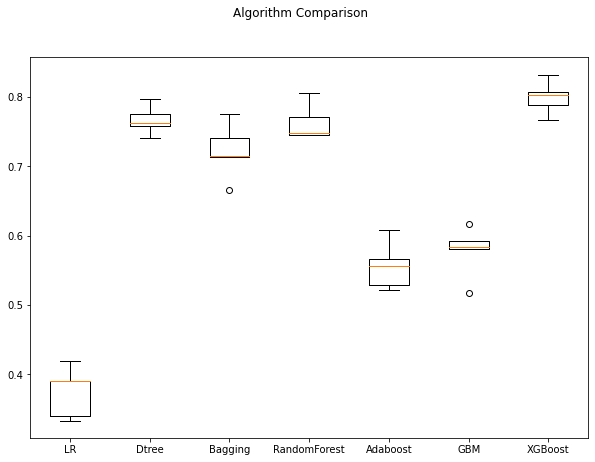

In [89]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Decision Tree Classifier

In [117]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.936945  0.825858   0.804627  0.815104 



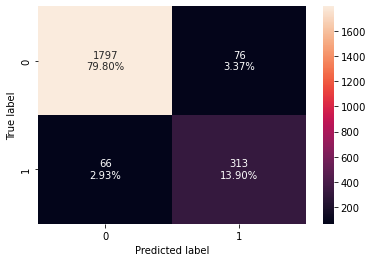

In [97]:
print("Training Performance :")
dtree_train_perf = model_performance_classification(dtree, X_train, y_train)
print(dtree_train_perf)

print("\nValidation Performace :")
dtree_val_perf = model_performance_classification(dtree, X_val, y_val)
print(dtree_val_perf, "\n")

confusion_matrix_sklearn(dtree, X_val, y_val)

Hyperparameter tuning

In [98]:
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.20, 1: 0.80}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
}


In [99]:
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_leaf_nodes=15, random_state=1)

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.829929  0.792619    0.49697  0.610904

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.840586  0.796834   0.517123  0.627207 



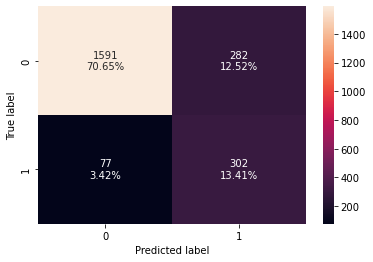

In [100]:
print("Training Performance :")
dtree_tuned_train_perf = model_performance_classification(dtree_tuned, X_train, y_train)
print(dtree_tuned_train_perf)

print("\nValidation Performace :")
dtree_tuned_val_perf = model_performance_classification(dtree_tuned, X_val, y_val)
print(dtree_tuned_val_perf, "\n")

confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

In [101]:
#Bagging Classifier

In [102]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.996004  0.979789   0.996425  0.988037

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.954263  0.799472   0.918182  0.854725 



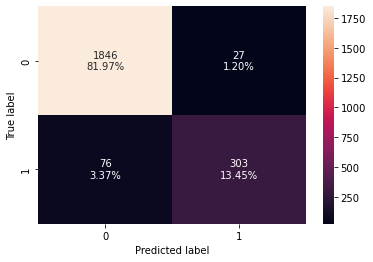

In [103]:
print("Training Performance :")
bagging_train_perf = model_performance_classification(bagging, X_train, y_train)
print(bagging_train_perf)

print("\nValidation Performace :")
bagging_val_perf = model_performance_classification(bagging, X_val, y_val)
print(bagging_val_perf, "\n")

confusion_matrix_sklearn(bagging, X_val, y_val)

In [104]:
# Fitting the model with dtree_tuned as base_estimator
bagging_tdtree = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)
bagging_tdtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=5,
                                                        max_leaf_nodes=15,
                                                        random_state=1),
                  random_state=1)

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.858496  0.803163   0.555286  0.656609

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.868561  0.802111   0.579048  0.672566 



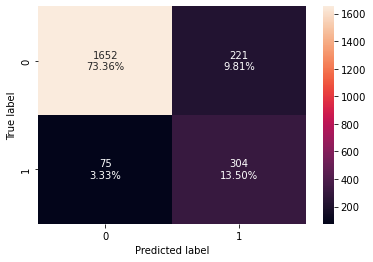

In [105]:
print("Training Performance :")
bagging_tdtree_train_perf = model_performance_classification(
    bagging_tdtree, X_train, y_train
)
print(bagging_tdtree_train_perf)

print("\nValidation Performace :")
bagging_tdtree_val_perf = model_performance_classification(bagging_tdtree, X_val, y_val)
print(bagging_tdtree_val_perf, "\n")

confusion_matrix_sklearn(bagging_tdtree, X_val, y_val)

In [106]:
# Hyperparameter tuning

In [120]:
bagging_tuned_tdtree = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)

In [121]:
parameters = {
    "max_samples": np.arange(0.2, 1, 0.1),
    "n_estimators": [40, 50, 60],
    "max_features": np.arange(0.2, 1, 0.1),
}

In [122]:
grid_obj = GridSearchCV(bagging_tuned_tdtree, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [123]:
bagging_tuned_tdtree = grid_obj.best_estimator_

In [124]:
bagging_tuned_tdtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=5,
                                                        max_leaf_nodes=15,
                                                        random_state=1),
                  max_features=0.8000000000000003,
                  max_samples=0.8000000000000003, n_estimators=50,
                  random_state=1)

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.880847  0.806678   0.610778  0.695191

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.887655  0.796834   0.631799  0.704784 



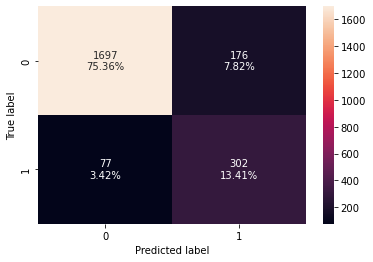

In [125]:
print("Training Performance :")
bagging_tuned_tdtree_train_perf = model_performance_classification(
    bagging_tuned_tdtree, X_train, y_train
)
print(bagging_tuned_tdtree_train_perf)

print("\nValidation Performace :")
bagging_tuned_tdtree_val_perf = model_performance_classification(
    bagging_tuned_tdtree, X_val, y_val
)
print(bagging_tuned_tdtree_val_perf, "\n")

confusion_matrix_sklearn(bagging_tuned_tdtree, X_val, y_val)

In [126]:
#hyper parameter tuning

In [127]:
bagging_tuned_tdtree = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)

In [128]:
parameters = {
    "max_samples": np.arange(0.2, 1, 0.1),
    "n_estimators": [40, 50, 60],
    "max_features": np.arange(0.2, 1, 0.1),
}

In [129]:
grid_obj = GridSearchCV(bagging_tuned_tdtree, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [130]:
bagging_tuned_tdtree = grid_obj.best_estimator_

In [131]:
bagging_tuned_tdtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=5,
                                                        max_leaf_nodes=15,
                                                        random_state=1),
                  max_features=0.8000000000000003,
                  max_samples=0.8000000000000003, n_estimators=50,
                  random_state=1)

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.880847  0.806678   0.610778  0.695191

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.887655  0.796834   0.631799  0.704784 



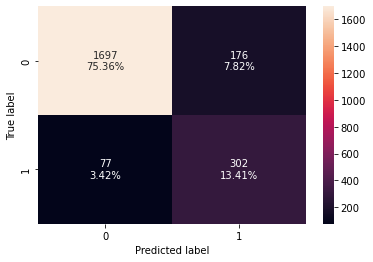

In [135]:
print("Training Performance :")
bagging_tuned_tdtree_train_perf = model_performance_classification(bagging_tuned_tdtree, X_train, y_train)

print(bagging_tuned_tdtree_train_perf)

print("\nValidation Performace :")
bagging_tuned_tdtree_val_perf = model_performance_classification(bagging_tuned_tdtree, X_val, y_val)

print(bagging_tuned_tdtree_val_perf, "\n")

confusion_matrix_sklearn(bagging_tuned_tdtree, X_val, y_val)

In [136]:
bagging_tuned_dt = BaggingClassifier(base_estimator=dtree, random_state=1)

In [137]:
parameters = {
    "max_samples": np.arange(0.2, 1, 0.1),
    "n_estimators": [60, 70, 80],
    "max_features": [0.7, 0.8, 0.9, 1],
}

In [138]:
grid_obj = GridSearchCV(bagging_tuned_dt, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [139]:
bagging_tuned_dt = grid_obj.best_estimator_

In [140]:
bagging_tuned_dt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, max_samples=0.9000000000000001,
                  n_estimators=70, random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.962256  0.831135     0.9375  0.881119 



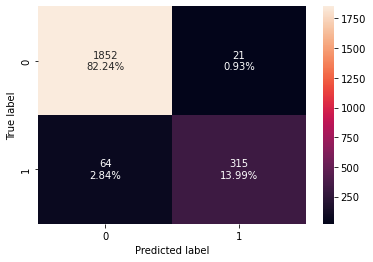

In [141]:
print("Training Performance :")
bagging_tuned_dt_train_perf = model_performance_classification(
    bagging_tuned_dt, X_train, y_train
)
print(bagging_tuned_dt_train_perf)

print("\nValidation Performace :")
bagging_tuned_dt_val_perf = model_performance_classification(
    bagging_tuned_dt, X_val, y_val
)
print(bagging_tuned_dt_val_perf, "\n")

confusion_matrix_sklearn(bagging_tuned_dt, X_val, y_val)

In [142]:
#   Random Forest Classifier

In [143]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.963588  0.825858   0.951368  0.884181 



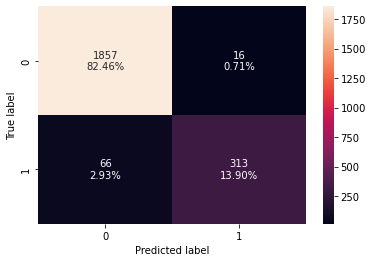

In [144]:
print("Training Performance :")
rf_train_perf = model_performance_classification(rf, X_train, y_train)
print(rf_train_perf)

print("\nValidation Performace :")
rf_val_perf = model_performance_classification(rf, X_val, y_val)
print(rf_val_perf, "\n")

confusion_matrix_sklearn(rf, X_val, y_val)

In [145]:
print(
    pd.DataFrame(
        rf.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Tenure                   0.254550
cashback                 0.087726
CC_Contacted_LY          0.070300
Day_Since_CC_connect     0.069844
Complain_ly              0.065625
rev_growth_yoy           0.060278
rev_per_month            0.054532
CC_Agent_Score           0.054427
Payment                  0.045580
account_segment          0.039560
Marital_Status           0.038855
Account_user_count       0.037935
coupon_used_for_payment  0.028591
City_Tier                0.026126
Login_device             0.025066
Service_Score            0.021237
Gender                   0.019767


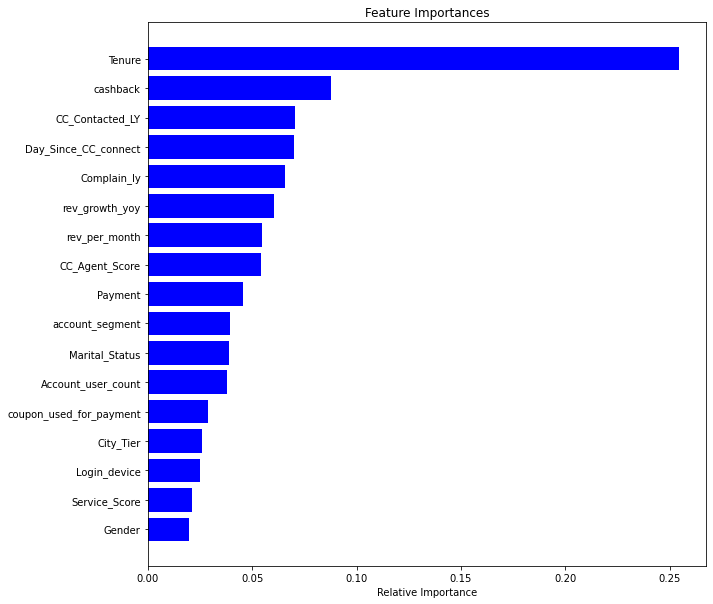

In [217]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [148]:
rf_tuned = RandomForestClassifier(class_weight={0: 17, 1: 83}, random_state=1)

In [149]:
parameters = {
    "n_estimators": [206],
    "min_samples_leaf": [5, 6, 7],
    "max_samples": [0.5, 0.6, 0.7],
    "max_features": np.arange(0.2, 0.7, 0.1),
}


In [150]:
grid_obj = GridSearchCV(rf_tuned, parameters, scoring="recall", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

In [151]:
rf_tuned = grid_obj.best_estimator_

In [152]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 17, 1: 83},
                       max_features=0.6000000000000001, max_samples=0.7,
                       min_samples_leaf=6, n_estimators=206, random_state=1)

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.957667  0.963972   0.817437  0.884677

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.928064  0.852243   0.752914  0.799505 



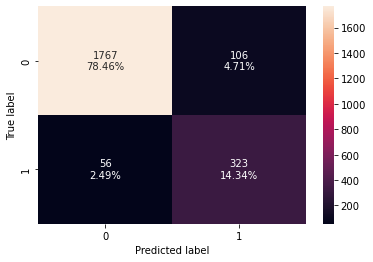

In [153]:
print("Training Performance :")
rf_tuned_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print(rf_tuned_train_perf)

print("\nValidation Performace :")
rf_tuned_val_perf = model_performance_classification(rf_tuned, X_val, y_val)
print(rf_tuned_val_perf, "\n")

confusion_matrix_sklearn(rf_tuned, X_val, y_val)

In [154]:
## XGBoost Classifier

In [155]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1, ...)

Training Performance :
   Accuracy    Recall  Precision       F1
0  0.999704  0.998243        1.0  0.99912

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.963144  0.846966   0.927746  0.885517 



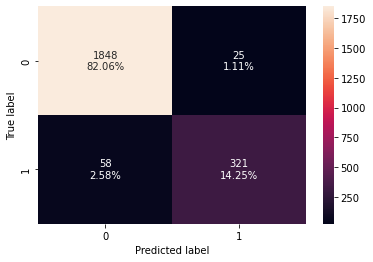

In [156]:
print("Training Performance :")
xgb_train_perf = model_performance_classification(xgb, X_train, y_train)
print(xgb_train_perf)

print("\nValidation Performace :")
xgb_val_perf = model_performance_classification(xgb, X_val, y_val)
print(xgb_val_perf, "\n")

confusion_matrix_sklearn(xgb, X_val, y_val)

In [157]:
## Hyperparameter tuning

In [158]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

In [159]:
parameters = {
    "n_estimators": [90],  # np.arange(10, 100, 10),
    "scale_pos_weight": [5],  # [0, 1, 2, 5],
    "subsample": [1],  # [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.2],  # [0.01, 0.1, 0.2, 0.05],
    "gamma": [3],  # [0, 1, 3],
    "colsample_bytree": [0.9],  # [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5],  # [0.5, 0.7, 0.9, 1],
}

In [160]:
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring="recall", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


In [161]:
xgb_tuned = grid_obj.best_estimator_


In [162]:
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

Training Performance :
   Accuracy    Recall  Precision       F1
0   0.98357  0.998243    0.91245  0.95342

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.946714  0.907652   0.801865  0.851485 



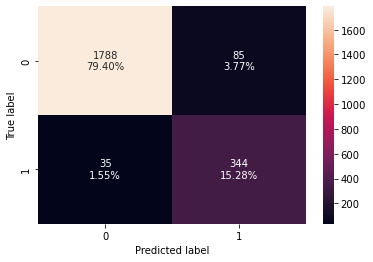

In [163]:
print("Training Performance :")
xgb_tuned_train_perf = model_performance_classification(xgb_tuned, X_train, y_train)
print(xgb_tuned_train_perf)

print("\nValidation Performace :")
xgb_tuned_val_perf = model_performance_classification(xgb_tuned, X_val, y_val)
print(xgb_tuned_val_perf, "\n")

confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

In [164]:
print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Tenure                   0.183042
Complain_ly              0.136423
Marital_Status           0.069657
account_segment          0.067497
City_Tier                0.062695
Day_Since_CC_connect     0.052955
CC_Agent_Score           0.052544
Gender                   0.048290
rev_per_month            0.044549
Payment                  0.043945
CC_Contacted_LY          0.039995
Account_user_count       0.039992
Login_device             0.038394
coupon_used_for_payment  0.033213
cashback                 0.032431
rev_growth_yoy           0.032060
Service_Score            0.022319


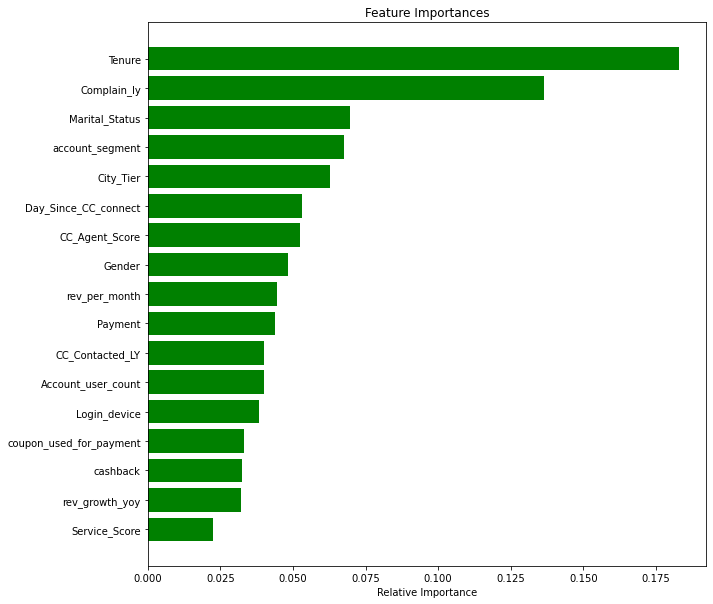

In [218]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [167]:
##Comparison of Train and Validation Performances

In [168]:
models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        bagging_train_perf.T,
        bagging_tdtree_train_perf.T,
        bagging_tuned_tdtree_train_perf.T,
        bagging_tuned_dt_train_perf.T,
        rf_train_perf.T,
        rf_tuned_train_perf.T,
        xgb_train_perf.T,
        xgb_tuned_train_perf.T,
    ],
    axis=1,
)

In [169]:
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging with default parameters",
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
    "Bagging Tuned with base dtree",
    "Random Forest",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned",
]

In [170]:
models_val_comp_df = pd.concat(
    [
        dtree_val_perf.T,
        dtree_tuned_val_perf.T,
        bagging_val_perf.T,
        bagging_tdtree_val_perf.T,
        bagging_tuned_tdtree_val_perf.T,
        bagging_tuned_dt_val_perf.T,
        rf_val_perf.T,
        rf_tuned_val_perf.T,
        xgb_val_perf.T,
        xgb_tuned_val_perf.T,
    ],
    axis=1,
)

In [171]:
models_val_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging with default parameters",
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
    "Bagging Tuned with dtree",
    "Random Forest",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned",
]

In [172]:
print("Training performance comparison :")
models_train_comp_df

Training performance comparison :


,Decision Tree,Decision Tree Tuned,Bagging with default parameters,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned,Bagging Tuned with base dtree,Random Forest,Random Forest Tuned,XGBoost,XGBoost Tuned
Accuracy,1.0,0.829929,0.996004,0.858496,0.880847,1.0,1.0,0.957667,0.999704,0.983570
Recall,1.0,0.792619,0.979789,0.803163,0.806678,1.0,1.0,0.963972,0.998243,0.998243
Precision,1.0,0.496970,0.996425,0.555286,0.610778,1.0,1.0,0.817437,1.000000,0.912450
F1,1.0,0.610904,0.988037,0.656609,0.695191,1.0,1.0,0.884677,0.999120,0.953420


In [173]:
print("Validation performance comparison :")
models_val_comp_df

Validation performance comparison :


,Decision Tree,Decision Tree Tuned,Bagging with default parameters,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned,Bagging Tuned with dtree,Random Forest,Random Forest Tuned,XGBoost,XGBoost Tuned
Accuracy,0.936945,0.840586,0.954263,0.868561,0.887655,0.962256,0.963588,0.928064,0.963144,0.946714
Recall,0.825858,0.796834,0.799472,0.802111,0.796834,0.831135,0.825858,0.852243,0.846966,0.907652
Precision,0.804627,0.517123,0.918182,0.579048,0.631799,0.937500,0.951368,0.752914,0.927746,0.801865
F1,0.815104,0.627207,0.854725,0.672566,0.704784,0.881119,0.884181,0.799505,0.885517,0.851485


In [174]:
best_models_train_comp_df = pd.concat(
    [bagging_tdtree_train_perf.T, bagging_tuned_tdtree_train_perf.T,], axis=1,
)

best_models_train_comp_df.columns = [
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
]


In [175]:
best_models_val_comp_df = pd.concat(
    [bagging_tdtree_val_perf.T, bagging_tuned_tdtree_val_perf.T,], axis=1,
)

In [176]:
best_models_val_comp_df.columns = [
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
]

In [177]:
print("Training performance comparison :")
best_models_train_comp_df

Training performance comparison :


,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned
Accuracy,0.858496,0.880847
Recall,0.803163,0.806678
Precision,0.555286,0.610778
F1,0.656609,0.695191


In [178]:
print("Validation performance comparison :")
best_models_val_comp_df

Validation performance comparison :


,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned
Accuracy,0.868561,0.887655
Recall,0.802111,0.796834
Precision,0.579048,0.631799
F1,0.672566,0.704784


In [179]:
## Stacking Classifier

In [180]:
estimators1 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging Tuned with base dtree_tuned", bagging_tuned_tdtree),
]

In [181]:
final_estimator = xgb_tuned


In [182]:
stacking_classifier1 = StackingClassifier(
    estimators=estimators1, final_estimator=final_estimator
)

In [183]:
stacking_classifier1.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=5,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging Tuned with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=5,
                                                                                        max_leaf_node...
                                                 feature_types=None, gamma=3,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.2, max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=90, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, ...))

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.847543  0.801406   0.531469  0.639103

Validation Performace :
   Accuracy    Recall  Precision        F1
0   0.85746  0.802111   0.552727  0.654467


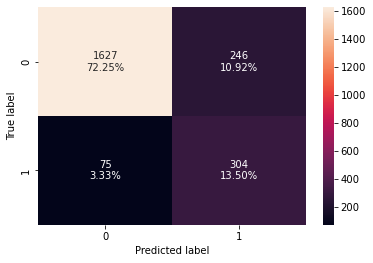

In [184]:
print("Training Performance :")
stacking1_train_perf = model_performance_classification(
    stacking_classifier1, X_train, y_train
)
print(stacking1_train_perf)

print("\nValidation Performace :")
stacking1_val_perf = model_performance_classification(
    stacking_classifier1, X_val, y_val
)
print(stacking1_val_perf)

confusion_matrix_sklearn(stacking_classifier1, X_val, y_val)

In [185]:
# Stacking 2

In [186]:
estimators2 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree_tuned", bagging_tuned_tdtree),
]

In [187]:
final_estimator = xgb_tuned

In [188]:
stacking_classifier2 = StackingClassifier(
    estimators=estimators2, final_estimator=final_estimator
)

In [189]:
stacking_classifier2.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=5,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree_tuned',
                                BaggingClassifier(base_estimator=Decision...
                                                 feature_types=None, gamma=3,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.2, max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=90, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, ...))

Training Performance :
   Accuracy    Recall  Precision        F1
0  0.987271  0.997364   0.931856  0.963497

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.939609  0.926121   0.764706  0.837709


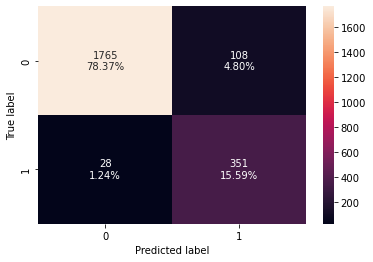

In [190]:
print("Training Performance :")
stacking2_train_perf = model_performance_classification(
    stacking_classifier2, X_train, y_train
)
print(stacking2_train_perf)

print("\nValidation Performace :")
stacking2_val_perf = model_performance_classification(
    stacking_classifier2, X_val, y_val
)
print(stacking2_val_perf)

confusion_matrix_sklearn(stacking_classifier2, X_val, y_val)

In [191]:
# Stacking 3

In [192]:
estimators3 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree", bagging_tuned_dt),
]

In [193]:
final_estimator = xgb_tuned

In [194]:
stacking_classifier3 = StackingClassifier(
    estimators=estimators3, final_estimator=final_estimator
)
stacking_classifier3.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=5,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree',
                                BaggingClassifier(base_estimator=DecisionTreeCl...
                                                 feature_types=None, gamma=3,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.2, max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=90, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, ...))

Training Performance :
   Accuracy  Recall  Precision        F1
0   0.99852     1.0   0.991289  0.995626

Validation Performace :
   Accuracy    Recall  Precision       F1
0  0.949822  0.939314   0.798206  0.86303


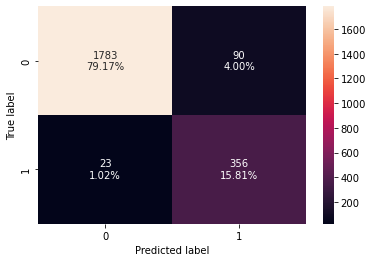

In [195]:
print("Training Performance :")
stacking3_train_perf = model_performance_classification(
    stacking_classifier3, X_train, y_train
)
print(stacking3_train_perf)

print("\nValidation Performace :")
stacking3_val_perf = model_performance_classification(
    stacking_classifier3, X_val, y_val
)
print(stacking3_val_perf)

confusion_matrix_sklearn(stacking_classifier3, X_val, y_val)

In [196]:
# Stacking 4

In [197]:
estimators4 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree", bagging_tuned_dt),
    ("Random Forest", rf),
]


In [198]:
final_estimator = xgb_tuned

In [199]:
stacking_classifier4 = StackingClassifier(
    estimators=estimators4, final_estimator=final_estimator
)

In [200]:
stacking_classifier4.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=5,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree',
                                BaggingClassifier(base_estimator=DecisionTreeCl...
                                                 feature_types=None, gamma=3,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.2, max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=90, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, ...))

Training Performance :
   Accuracy  Recall  Precision        F1
0  0.999852     1.0   0.999122  0.999561

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.960924  0.941953   0.843972  0.890274


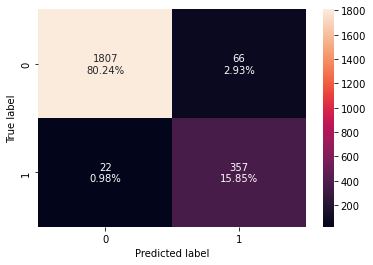

In [203]:
print("Training Performance :")
stacking4_train_perf = model_performance_classification(
    stacking_classifier4, X_train, y_train
)
print(stacking4_train_perf)

print("\nValidation Performace :")
stacking4_val_perf = model_performance_classification(
    stacking_classifier4, X_val, y_val
)
print(stacking4_val_perf)

confusion_matrix_sklearn(stacking_classifier4, X_val, y_val)

In [205]:
##Comparison of Stacking Model Performances

In [206]:
stack_models_train_comp_df = pd.concat(
    [
        stacking1_train_perf.T,
        stacking2_train_perf.T,
        stacking3_train_perf.T,
        stacking4_train_perf.T,
    ],
    axis=1,
)

In [207]:
stack_models_train_comp_df.columns = [
    "Stacking_Classifier1",
    "Stacking_Classifier2",
    "Stacking_Classifier3",
    "Stacking_Classifier4",
]

In [208]:
#training

stack_models_val_comp_df = pd.concat(
    [
        stacking1_val_perf.T,
        stacking2_val_perf.T,
        stacking3_val_perf.T,
        stacking4_val_perf.T,
    ],
    axis=1,
)

In [209]:
stack_models_val_comp_df.columns = [
    "Stacking_Classifier1",
    "Stacking_Classifier2",
    "Stacking_Classifier3",
    "Stacking_Classifier4",
]

In [210]:
print("Stacking models Training performance comparison :")
stack_models_train_comp_df

Stacking models Training performance comparison :


,Stacking_Classifier1,Stacking_Classifier2,Stacking_Classifier3,Stacking_Classifier4
Accuracy,0.847543,0.987271,0.998520,0.999852
Recall,0.801406,0.997364,1.000000,1.000000
Precision,0.531469,0.931856,0.991289,0.999122
F1,0.639103,0.963497,0.995626,0.999561


In [211]:
print("Stacking models Validation performance comparison :")
stack_models_val_comp_df

Stacking models Validation performance comparison :


,Stacking_Classifier1,Stacking_Classifier2,Stacking_Classifier3,Stacking_Classifier4
Accuracy,0.857460,0.939609,0.949822,0.960924
Recall,0.802111,0.926121,0.939314,0.941953
Precision,0.552727,0.764706,0.798206,0.843972
F1,0.654467,0.837709,0.863030,0.890274


In [213]:
## Best Model - Performance

Training Performance :
   Accuracy  Recall  Precision        F1
0  0.999852     1.0   0.999122  0.999561

Validation Performace :
   Accuracy    Recall  Precision        F1
0  0.960924  0.941953   0.843972  0.890274

Test Performace :
   Accuracy    Recall  Precision        F1
0  0.967584  0.944591   0.873171  0.907478


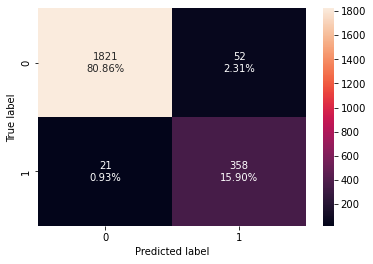

In [214]:
print("Training Performance :")
stacking4_train_perf = model_performance_classification(
    stacking_classifier4, X_train, y_train
)
print(stacking4_train_perf)

print("\nValidation Performace :")
stacking4_val_perf = model_performance_classification(
    stacking_classifier4, X_val, y_val
)
print(stacking4_val_perf)

print("\nTest Performace :")
stacking4_test_perf = model_performance_classification(
    stacking_classifier4, X_test, y_test
)
print(stacking4_test_perf)

confusion_matrix_sklearn(stacking_classifier4, X_test, y_test)

In [216]:
##   ******